# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [4]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | BA is not treating its premium ...
1,✅ Trip Verified | 24 hours before our departu...
2,✅ Trip Verified | We arrived at Heathrow at 0...
3,✅ Trip Verified | Original flight was cancell...
4,Not Verified | Airport check in was functiona...


In [5]:
df.to_csv("/home/nanthini/Documents/Data Science MBA/Internship/British Airways/data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

Data Preprocessing 

The preprocessing steps which I preformed below are 
1. Treating accented and special characters
2. Removing stop words
3. Lowercasting
4. Tokenization
5. Text Standardization - 1. stemming and 2. Lemmatization

Context
Working with text data presents a number of challenges, such as the use of special characters, accented characters, or word inflections. However, in order to extract meaningful information from text and prepare data for modeling, libraries designed for working with text data have made the process much simpler and are nowadays a crucial part of basic Natural Language Processing.


Two libraries in particular that provide great ease of use in working with text data are:

NLTK
spaCy

NLTK Library

In [6]:
!pip install nltk

In [7]:
import nltk
print(nltk.__version__)

3.7


In [8]:
# Helps to create the data frames
import pandas as pd

In [10]:
# Downloading the 'punkt' module that will be helpful for tokenization
nltk.download('punkt')

# Downloading the 'stopwords' module that will be helpful for Stopwrods removal
nltk.download('stopwords')

# Downloading the 'wordnet' module that will be helpful for stemming and lemmatization
nltk.download('wordnet')

# Downloading the 'omw1.4', dependency for Tokenization
nltk.download('omw-1.4')

# Downloading the 'averaged_perceptron_tagger' for POS_Tagging
nltk.download('averaged_perceptron_tagger')

# Downloading  the required modules that are used in NER tagging
nltk.download('maxent_ne_chunker')
nltk.download('words')

KeyboardInterrupt: 

**Let's import all the necessary functions that are required to perform tasks on text data using the downloaded modules.**

In [11]:
# Helpful to remove the stopwords
from nltk.corpus import stopwords

# Helpful in Lemmatization
from nltk.stem import WordNetLemmatizer

# Helpful in Tokenization
from nltk.tokenize import word_tokenize, sent_tokenize

# Used in Stemming
from nltk.stem.porter import PorterStemmer


# Used in NER Tagging
from nltk.corpus import treebank_chunk
from nltk.chunk import ne_chunk

In [12]:
# Loading the data
messages = pd.read_csv("/home/nanthini/Documents/Data Science MBA/Internship/British Airways/data/BA_reviews.csv")

In [13]:
# Creating a copy of the data frame
data = messages.copy()

In [14]:
data.head()

,Unnamed: 0,reviews
0,0,Not Verified | BA is not treating its premium ...
1,1,✅ Trip Verified | 24 hours before our departu...
2,2,✅ Trip Verified | We arrived at Heathrow at 0...
3,3,✅ Trip Verified | Original flight was cancell...
4,4,Not Verified | Airport check in was functiona...


In [15]:
data.tail()

,Unnamed: 0,reviews
995,995,✅ Trip Verified | London to Toronto. Group of...
996,996,✅ Trip Verified | Madrid to Heathrow. I fly w...
997,997,✅ Trip Verified | Singapore to London. They wa...
998,998,✅ Trip Verified | Washington to Frankfurt via...
999,999,✅ Trip Verified | Rome to London. Our flight ...


**Check the data types of the columns for the dataset**

In [16]:
data.shape

(1000, 2)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   reviews     1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


### **Checking for duplicate values**

In [18]:
# checking for duplicate values
data.duplicated().sum()

0

In [19]:
# dropping the duplicates if any
data = data.drop_duplicates(keep = 'first')

# checking for duplicate values
data.duplicated().sum()

0

In [20]:
# resetting the index of the dataframe
data = data.reset_index(drop = True)

## **Exploratory Data Analysis**

In [21]:
import seaborn as sns
### **Let's now take a look at some of the messages in the data to get a sense for the text preprocessing required**

In [22]:
data['reviews'][6]

"✅ Trip Verified |  Came from Glasgow to London and took connecting flight American Airlines from London to North Carolina. It's my third day here in North Carolina and still waiting for my luggage. They didn't even bother to transfer the luggage to connecting flight. Luggage are still in Glasgow. "

In [23]:
data['reviews'][0]

'Not Verified | BA is not treating its premium economy passengers with respect. You pay for a premium economy service and are then compelled to use the economy toilets at the back of the plane. This is short-changing passengers. My solution: fly with Virgin and make my way to Kingston.'

In [26]:
data['reviews'][998]

'✅ Trip Verified |  Washington to Frankfurt via London. Check-In at Dulles Airport was smooth. I asked the agent if it was possible to get a window seat and she did, even though at the online check-in there was none available. Boeing 747-400 was 27 years old, the IFE was the size of my wallet and the quality was incredibly bad. The seats were ok, pretty standard but they had a head rest which was good. My seat was 27A and I had the whole row for myself. Unfortunately a crew member shortly before take-off told me that another passenger had issues with his IFE and they would replace him on 27C. Shortly after take-off the service began. There were 2 food options available. Chicken and vegatarian lasagne, I went for the Lasagne which was ok, nothing special. It came with a salad, a bread bun and a black forest cake. All in all an ok meal, nothing to complain about. The crew distributed 2 mini cans of soda which was a bit unsatisfying. After dinner the crew dimmed the lights and we were sup

In [27]:
data['reviews'][489]

'✅ Trip Verified |  Mumbai to London Heathrow. I wish to highly commend the professionalism of the stewards on this flight. Someone had erroneously accused me of being on a flight from Goa to Mumbai and coughing throughout the journey. Categorically I was not on that flight, but in his agitation the passenger could not hear me when I repeatedly said so. The stewards dealt with this situation with tact, absolute professionalism and great courtesy. All the staff must be working in difficult circumstances at the moment. They are putting themselves at more risk than most to ensure that holiday makers and business people can get home safely and I wish to thank our crew in particular for what they did.'

From the random samples seen above, we observe that the text has:

Extra spaces

Accented and Special characters

Misspelled words

Word inflections - can be observed in row 10 where words like suffered,reclined,allocated,getting,touching,kindness,climbing and failed can be reduced to their base forms.

Lowercase and Uppercase characters

The presence of such unwanted text doesn't add any value and also impacts the learning of a model, thus reducing the model's performance.

Hence, we shall be removing such unwanted text.

**Text Preprocessing Step 1


Removing accented characters from the text
Accents are special string characters generally adapted from other languages. They are not considered a major part of English.
By using the unidecode library, we can transliterate any unicode string into the closest possible representation in ASCII text.

In [30]:
# It helps to remove the accented characters 

import unidecode

In [49]:
# Let's look at the first two text messages
data['reviews'][0:2]

0    Not Verified | BA is not treating its premium ...
1    ✅ Trip Verified |  24 hours before our departu...
Name: reviews, dtype: object

In [50]:
# defining an empty list
reviews = []

# looping over each message in the data
for i in range(data.shape[0]):

    t = data['reviews'][i].split()
    # Applying the unicode data on a sentence and replacing the accented words to get the closest possible ASCII text
    new_text = [unidecode.unidecode(word) for word in t]
    
    # Combining the seperate words into sentence
    new_text = ' '.join(new_text)
    # append the new_text to list text
    reviews.append(new_text)

data['cleaned_text'] = reviews

In [51]:
data.loc[0:3,['reviews','cleaned_text']]

,reviews,cleaned_text
0,Not Verified | BA is not treating its premium ...,Not Verified | BA is not treating its premium ...
1,✅ Trip Verified | 24 hours before our departu...,Trip Verified | 24 hours before our departure...
2,✅ Trip Verified | We arrived at Heathrow at 0...,Trip Verified | We arrived at Heathrow at 060...
3,✅ Trip Verified | Original flight was cancell...,Trip Verified | Original flight was cancelled...


Text Preprocessing Step 2

Removing special characters from the text

The function isalnum() method returns True if all the characters are alphanumeric, meaning alphabet letter (a-z) and numbers (0-9). By using this function we can retrive the
data which consists of only letters and numbers.

In [52]:
# let's consider the below example
data['reviews'][998]

'✅ Trip Verified |  Washington to Frankfurt via London. Check-In at Dulles Airport was smooth. I asked the agent if it was possible to get a window seat and she did, even though at the online check-in there was none available. Boeing 747-400 was 27 years old, the IFE was the size of my wallet and the quality was incredibly bad. The seats were ok, pretty standard but they had a head rest which was good. My seat was 27A and I had the whole row for myself. Unfortunately a crew member shortly before take-off told me that another passenger had issues with his IFE and they would replace him on 27C. Shortly after take-off the service began. There were 2 food options available. Chicken and vegatarian lasagne, I went for the Lasagne which was ok, nothing special. It came with a salad, a bread bun and a black forest cake. All in all an ok meal, nothing to complain about. The crew distributed 2 mini cans of soda which was a bit unsatisfying. After dinner the crew dimmed the lights and we were sup

In [54]:
# splitting text into separate words
example = data['reviews'][998].split()
example

['✅',
 'Trip',
 'Verified',
 '|',
 'Washington',
 'to',
 'Frankfurt',
 'via',
 'London.',
 'Check-In',
 'at',
 'Dulles',
 'Airport',
 'was',
 'smooth.',
 'I',
 'asked',
 'the',
 'agent',
 'if',
 'it',
 'was',
 'possible',
 'to',
 'get',
 'a',
 'window',
 'seat',
 'and',
 'she',
 'did,',
 'even',
 'though',
 'at',
 'the',
 'online',
 'check-in',
 'there',
 'was',
 'none',
 'available.',
 'Boeing',
 '747-400',
 'was',
 '27',
 'years',
 'old,',
 'the',
 'IFE',
 'was',
 'the',
 'size',
 'of',
 'my',
 'wallet',
 'and',
 'the',
 'quality',
 'was',
 'incredibly',
 'bad.',
 'The',
 'seats',
 'were',
 'ok,',
 'pretty',
 'standard',
 'but',
 'they',
 'had',
 'a',
 'head',
 'rest',
 'which',
 'was',
 'good.',
 'My',
 'seat',
 'was',
 '27A',
 'and',
 'I',
 'had',
 'the',
 'whole',
 'row',
 'for',
 'myself.',
 'Unfortunately',
 'a',
 'crew',
 'member',
 'shortly',
 'before',
 'take-off',
 'told',
 'me',
 'that',
 'another',
 'passenger',
 'had',
 'issues',
 'with',
 'his',
 'IFE',
 'and',
 'they',


In [55]:
# defining an empty list
reviews = []

# looping over each element of the list
for i in example:
  if i.isalnum():  # checking if the element is an alphabet or a number
    new_text = i   # if the element of the list is a number assign it to variable new_text
    reviews.append(new_text) # append the new_text to empty list text

print('New list with only alphabets and numbers: ', reviews)

# retriving the original text
# join() is an inbuilt string function in Python takes all items in an iterable and joins them into one string. 
print('Original Text: ',' '.join(reviews))

New list with only alphabets and numbers:  ['Trip', 'Verified', 'Washington', 'to', 'Frankfurt', 'via', 'at', 'Dulles', 'Airport', 'was', 'I', 'asked', 'the', 'agent', 'if', 'it', 'was', 'possible', 'to', 'get', 'a', 'window', 'seat', 'and', 'she', 'even', 'though', 'at', 'the', 'online', 'there', 'was', 'none', 'Boeing', 'was', '27', 'years', 'the', 'IFE', 'was', 'the', 'size', 'of', 'my', 'wallet', 'and', 'the', 'quality', 'was', 'incredibly', 'The', 'seats', 'were', 'pretty', 'standard', 'but', 'they', 'had', 'a', 'head', 'rest', 'which', 'was', 'My', 'seat', 'was', '27A', 'and', 'I', 'had', 'the', 'whole', 'row', 'for', 'Unfortunately', 'a', 'crew', 'member', 'shortly', 'before', 'told', 'me', 'that', 'another', 'passenger', 'had', 'issues', 'with', 'his', 'IFE', 'and', 'they', 'would', 'replace', 'him', 'on', 'Shortly', 'after', 'the', 'service', 'There', 'were', '2', 'food', 'options', 'Chicken', 'and', 'vegatarian', 'I', 'went', 'for', 'the', 'Lasagne', 'which', 'was', 'nothing'

Now let's apply the above steps to all the messages in the dataset

In [57]:
# defining an empty list
reviews = []

# looping over each message in the data
for i in range(data.shape[0]):
    words = data['cleaned_text'][i].split() # splitting text into separate words
    new_text = ' '.join([element for element in words if element.isalnum()]) # looping over each element of the list and using the join() function to retrive the original text
    reviews.append(new_text)  # append the new_text to empty list text
    
data['cleaned_text'] = reviews  

Let's take a look at some random samples to view the messages now

In [58]:
data.loc[[1,10,75,76,77,78],['reviews','cleaned_text']]

,reviews,cleaned_text
1,✅ Trip Verified | 24 hours before our departu...,Trip Verified 24 hours before our departure on...
10,✅ Trip Verified | My luggage was mis-tagged i...,Trip Verified My luggage was in Dallas on my w...
75,✅ Trip Verified | Why do you make it so hard? ...,Trip Verified Why do you make it so After a so...
76,✅ Trip Verified | After several delays and ca...,Trip Verified After several delays and cancele...
77,Not Verified | Literally the worst flight of ...,Not Verified Literally the worst flight of my ...
78,✅ Trip Verified | I swore I would never fly B...,Trip Verified I swore I would never fly BA aga...


1.isalnum() has removed the special characters from the text successfully.
2.If we observe the text closely, the words attached with the special characters have also been removed.
3.isalnum() is a stringent function and works well when the special characters are separated by a white space character or space.
4.Another efficient way to deal with special characters is to use the regex library.

In [60]:
# importing regex library
import re


# defining an empty list
reviews = []

# Specifying the pattern for regex to match a string of characters that are not a letters or numbers 
# regex will look for alphabets A to Z, a to z, and numbers 0 to 9
pattern = '[^A-Za-z0-9]+'

# looping over each message in the data
for i in range(data.shape[0]):

    words = data['cleaned_text'][i].split() # splitting text into separate words
    new_text = ''.join(re.sub(pattern, ' ', data['cleaned_text'][i])) # finding the pattern and using the join() function to retrive the original text
    reviews.append(new_text) # append the new_text to empty list text
    
data['cleaned_text'] = reviews 

Let's take a look at some random samples to view the text now.

In [61]:
data.loc[[1,10,75,76,77,78],['reviews','cleaned_text']]

,reviews,cleaned_text
1,✅ Trip Verified | 24 hours before our departu...,Trip Verified 24 hours before our departure on...
10,✅ Trip Verified | My luggage was mis-tagged i...,Trip Verified My luggage was in Dallas on my w...
75,✅ Trip Verified | Why do you make it so hard? ...,Trip Verified Why do you make it so After a so...
76,✅ Trip Verified | After several delays and ca...,Trip Verified After several delays and cancele...
77,Not Verified | Literally the worst flight of ...,Not Verified Literally the worst flight of my ...
78,✅ Trip Verified | I swore I would never fly B...,Trip Verified I swore I would never fly BA aga...


We can observe that regex simply removed the special characters and retained the alphabets and numbers.

Text Preprocessing Step 3

Lowercasing

Lowercasing is an important text preprocessing technique. The goal is to change the input text's case so that the words "text," "Text," and "TEXT" are all treated equally. Strings in Python are of course case-sensitive, so Python will not automatically do this for us.
Lowercasing helps reduce duplication and obtain accurate counts - it is hence an important part of various "feature extraction" approaches for text data.

In [62]:
# defining an empty list
reviews = []

# looping over each message in the data
for i in range(data.shape[0]):
    # lowecasing the text using the lower() function
    new_text = data['cleaned_text'][i].lower()
    reviews.append(new_text) # append the new_text to empty list text

data['cleaned_text'] = reviews

In [64]:
data.loc[0:1000,['reviews','cleaned_text']]

,reviews,cleaned_text
0,Not Verified | BA is not treating its premium ...,not verified ba is not treating its premium ec...
1,✅ Trip Verified | 24 hours before our departu...,trip verified 24 hours before our departure on...
2,✅ Trip Verified | We arrived at Heathrow at 0...,trip verified we arrived at heathrow at 0600 t...
3,✅ Trip Verified | Original flight was cancell...,trip verified original flight was cancelled wi...
4,Not Verified | Airport check in was functiona...,not verified airport check in was functionary ...
...,...,...
995,✅ Trip Verified | London to Toronto. Group of...,trip verified london to group of 10 people age...
996,✅ Trip Verified | Madrid to Heathrow. I fly w...,trip verified madrid to i fly with ba on a reg...
997,✅ Trip Verified | Singapore to London. They wa...,trip verified singapore to they wanted to char...
998,✅ Trip Verified | Washington to Frankfurt via...,trip verified washington to frankfurt via at d...


We can observe that, all the text has now successfully been converted to lower case.

Text Preprocessing Step 4

Stripping Extra Spaces

Stripping helps remove spaces at the beginning and the end of the string/sentence.
The extra spaces in between the characters and the spaces at the start or end of the string do not add any value to the model, and will rather slow down its computation speed.
Thus, we can remove these extra spaces to make the model more efficient and targeted during the training process.

In [65]:
# defining an empty list
reviews = []

# looping over each message in the data
for i in range(data.shape[0]):
    # removing extra spaces from the text using strip() function
    new_text = data['cleaned_text'][i].strip() 
    reviews.append(new_text)  # append the new_text to empty list text
    
data['cleaned_text'] = reviews

In [66]:
print("Before stripping the text data:",data['reviews'][6])
print("After stripping the text data:",data['cleaned_text'][6])

Before stripping the text data: ✅ Trip Verified |  Came from Glasgow to London and took connecting flight American Airlines from London to North Carolina. It's my third day here in North Carolina and still waiting for my luggage. They didn't even bother to transfer the luggage to connecting flight. Luggage are still in Glasgow. 
After stripping the text data: trip verified came from glasgow to london and took connecting flight american airlines from london to north my third day here in north carolina and still waiting for my they even bother to transfer the luggage to connecting luggage are still in


We now see that we have eliminated redundant extra spaces from the text.
As we have now performed lowercasing, removed the special & accented characters and numbers, and also stripped the text of its extra spaces, this would be a good time to correct misspelled words, since the unwanted text has now been removed.

**Text Preprocessing Step 5**
**Spellchecking**

In [67]:
!pip install autocorrect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 330.7 kB/s eta 0:00:00m eta 0:00:010:01:01
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622363 sha256=7555e1a674bea32b5c45b468b07f525851a8c2fdee1a6fb85952206ee1d2884c
  Stored in directory: /home/nanthini/.cache/pip/wheels/4a/a8/1f/97371a508b82b380dd3faf1bd4ce40843cea1a6c6724f9d7cd
Successfully built autocorrect


In [69]:
from autocorrect import Speller

In [72]:
# intializing the spellchecker and setting the language to english
spell = Speller(lang = 'en')

# defining a function which will take text as an input break
def autospell(reviews):
  '''
  A function which takes text as an input, performs a spell check, and autocorrects misspelled words  
  text: text input (object)
  '''
  word = reviews.split() # splitting text into separate words 
  spells = [spell(w) for w in word] # Spell checking on each word
  return " ".join(spells) # retriving the original text

In [73]:
# defining an empty list
reviews = []

# looping over each message in the data
for i in range(data.shape[0]):
    # applying the autospell function on the text messages
    new_text = autospell(data['cleaned_text'][i]) 
    reviews.append(new_text) # append the new_text to empty list text

data['cleaned_text'] = reviews

In [75]:
# Now have a look at the spell corrected words
data.loc[0,['reviews','cleaned_text']]

reviews         Not Verified | BA is not treating its premium ...
cleaned_text    not verified ba is not treating its premium ec...
Name: 0, dtype: object

In [77]:
print("Before spell correct the text data:",data['reviews'][100])
print("After spell correct the text data:",data['cleaned_text'][100])

Before spell correct the text data: Not Verified |  We were flying World Traveller Plus their Premium service. What it was not was Premium. We have travelled with many airlines and lucky enough to fly Premium most times. BA's premium is the worst I have come across. The flight from Heathrow to JFK was just ok, the flight back was in a plane that should not be used. Old, dirty, uncomfortable with two broken seats out of the four we had, one would not recline and one reclined without using the button. BA needs to look at the Premium service and offer exactly that instead of trying to cut costs. They have fallen far behind their competitors, they were once my preferred airline but now I try and avoid at all costs. I would rather pay more and fly with someone else.
After spell correct the text data: not verified we were flying world traveller plus their premium what it was not was we have travelled with many airlines and lucky enough to fly premium most premium is the worst i have come the

Text Preprocessing Step 6

Stop word Removal

The simple idea with stop word removal is to exclude words that appear frequently throughout all the documents in the corpus. Pronouns and articles are typically categorized as stop words.

To implement this, we have two Python libraries that are built to be used for NLP operations. Let's have a look at them and we'll implement them through both libraries.

Before removing the stop words from the text however, let's have a look at the key words from the original data through visual representation.

**Word Cloud**
A word cloud (also known as a tag cloud or text cloud) is a visual representation of text, in which the words appear bigger the more often they are mentioned. Word clouds are great for visualizing unstructured text data and getting insights on trends and patterns.

**Let's look at the top 100 unique words in original messages**

In [80]:
pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 924.1 kB/s eta 0:00:00m eta 0:00:010:01:01
Note: you may need to restart the kernel to use updated packages.


In [84]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

There are 812219 words in the combination of all texts.


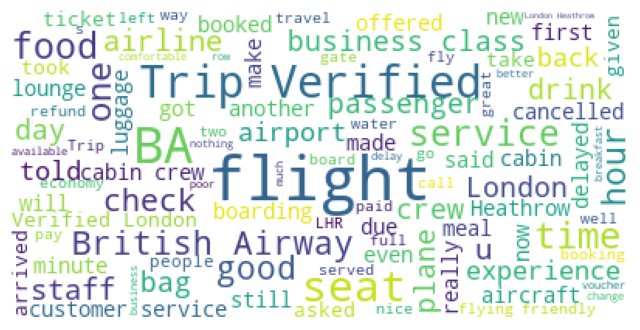

In [85]:
all_texts = " ".join(texts for texts in data.reviews)
print ("There are {} words in the combination of all texts.".format(len(all_texts)))

# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size = 40, max_words=100, background_color="white").generate(all_texts)
plt.figure(figsize=(8,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Let's look at the top 100 unique words in the messages where we have applied some text preprocessing steps

In [ ]:
all_texts = " ".join(texts for texts in data.cleaned_text)
print ("There are {} words in the combination of all texts.".format(len(all_texts)))

# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size = 40, max_words=100, background_color="white").generate(all_texts)
plt.figure(figsize=(8,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

**Removing the stop words using the NLTK library**

NLTK has an in-built list of stop words, and it can utilize that list to remove the stop words from the dataset.

In [88]:
# defining an empty list
reviews = []

for i in range(data.shape[0]):
    
    word = data['cleaned_text'][i].split() # splitting text into separate words 
    # removing the english language stopwords from the messages
    new_text = [w for w in word if not w in stopwords.words('english')] 
    new_text = ' '.join(new_text) #retriving the original text
    reviews.append(new_text) # 
    
data['NLTK_nostopwords_text'] = reviews 

In [89]:
data.loc[6:8,['cleaned_text','NLTK_nostopwords_text']]

,cleaned_text,NLTK_nostopwords_text
6,trip verified came from glasgow to london and ...,trip verified came glasgow london took connect...
7,trip verified my flight on on 12 may 2023 got ...,trip verified flight 12 may 2023 got delayed h...
8,not verified cairo is a 5 hour flight and ba c...,verified cairo 5 hour flight ba considers shor...


**After stop words removal**

There are 426692 words in the combination of all texts.


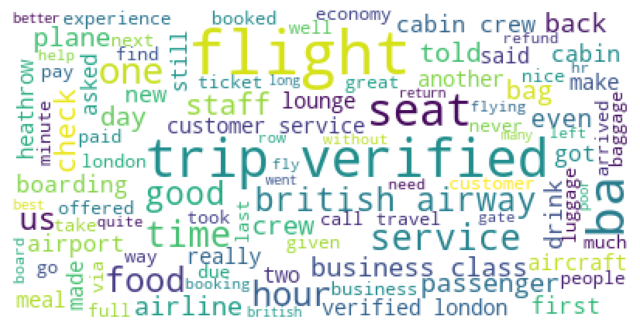

In [90]:
all_texts1 = " ".join(texts for texts in data.NLTK_nostopwords_text)

print ("There are {} words in the combination of all texts.".format(len(all_texts1)))

# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size = 40, max_words=100, background_color="white").generate(all_texts1)
plt.figure(figsize=(8,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

**Let's now implement the same with the spaCy library**

Similar to NLTK, spaCy also has its list of stop words. Let's see how spaCy performs.

In [94]:
!pip install -U spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 2.9 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.7/124.7 kB 527.7 kB/s eta 0:00:000:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.2/492.2 kB 1.4 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 234.1 kB/s eta 0:00:0031m5.6 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 2.6 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 215.7 kB/s eta 0:00:0031m11.4 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 kB 911.8 kB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 913.3/913.3 kB 2.1 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 2.5 MB/s eta 0:00:00m eta 0:00:0136m0:00:01


In [99]:
! python -m spacy download en_core_web_sm

Traceback (most recent call last):
  File "/home/nanthini/anaconda3/lib/python3.10/site-packages/urllib3/connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "/home/nanthini/anaconda3/lib/python3.10/site-packages/urllib3/util/connection.py", line 95, in create_connection
    raise err
  File "/home/nanthini/anaconda3/lib/python3.10/site-packages/urllib3/util/connection.py", line 85, in create_connection
    sock.connect(sa)
TimeoutError: [Errno 110] Connection timed out

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/nanthini/anaconda3/lib/python3.10/site-packages/urllib3/connectionpool.py", line 703, in urlopen
    httplib_response = self._make_request(
  File "/home/nanthini/anaconda3/lib/python3.10/site-packages/urllib3/connectionpool.py", line 386, in _make_request
    self._validate_conn(conn)
  File "/home/nanthini/anaconda3/lib/python3.10/site-packages/urllib3/connectionpool.

In [104]:
import spacy
print(spacy.__version__)

3.5.4


In [106]:
# To download the spacy langauge module
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 2.0 MB/s eta 0:00:00m eta 0:00:010:01:01m
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [107]:
!python -m spacy download fr_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 1.4 MB/s eta 0:00:00m eta 0:00:010:00:01m
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')


Now load the 'en_core_web_sm'. It is a small English pipeline trained on written web text (blogs, news, comments), that includes vocabulary, syntax and entities.

In [108]:
# Loading the english language small model of spacy
en = spacy.load('en_core_web_sm')

# loading the stopwords
spacy_stopwords = en.Defaults.stop_words

In [110]:
# defining an empty list
reviews = []

# looping over each message in the data
for i in range(data.shape[0]):
  t = data['cleaned_text'][i].split() # splitting text into separate words 
  # Removing the words that are present in the stopwords
  words = [word for word in t if not word in spacy_stopwords] 
  words = ' '.join(words) #retriving the original text
  reviews.append(words) # append the new_text to empty list text
    
data['spacy_nostopwords_text'] = reviews 

Let's have a comparison for both NLTK results and spaCy results to check how well they removed stop words

In [111]:
data.loc[100:105,['cleaned_text','spacy_nostopwords_text','NLTK_nostopwords_text']]

,cleaned_text,spacy_nostopwords_text,NLTK_nostopwords_text
100,not verified we were flying world traveller pl...,verified flying world traveller plus premium t...,verified flying world traveller plus premium t...
101,not verified this was literally one of the wor...,verified literally worst airport began orlando...,verified literally one worst airport began orl...
102,trip verified the usual symbolic unfolding tha...,trip verified usual symbolic unfolding ba unfo...,trip verified usual symbolic unfolding ba unfo...
103,not verified lost my case and took 6 weeks to ...,verified lost case took 6 weeks locate replied...,verified lost case took 6 weeks locate still r...
104,trip verified the incoming and outgoing flight...,trip verified incoming outgoing flight delayed...,trip verified incoming outgoing flight delayed...
105,trip verified back in december my family and i...,trip verified december family getting plane bo...,trip verified back december family getting ont...


From the above results, we can see that both libraries have performed decently and have been able to remove stop words.

Let's look at how many words are left in the data after removing stop words using spaCy.

Results of spaCy through word cloud

There are 380751 words in the combination of all texts.


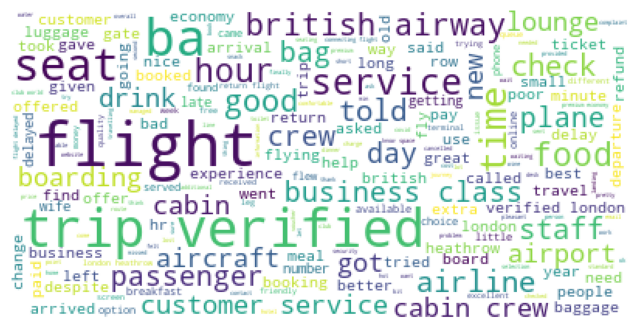

In [112]:
all_texts2 = " ".join(texts for texts in data.spacy_nostopwords_text)

print ("There are {} words in the combination of all texts.".format(len(all_texts2)))

# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size = 40, max_words = 200, background_color = "white").generate(all_texts2)
plt.figure(figsize = (8,12))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

We got 380751 after the stop word removal from the cleaned_text.
We can see that spaCy has been able to remove more stop words in comparison to NLTK.
We'll use text output with no stop words given by spaCy for further steps.

Now that stop words have been removed and the text doesn't contain unnecessary characters or words. Let's now apply the stemming and lemmatization techniques to reduce words to their base forms.

**Text Preprocessing Step 7**

**Stemming**

We have three types of stemmers available in the NLTK library:

Porter Stemmer
Snowball Stemmer
Lancaster Stemmer
Note: spaCy doesn't contain any function for stemming - it only provides support for lemmatization.

We are going to store each stemming technique's results into separate columns, so that different models can be built on these outputs and we can observe which stemming method works the best.

**Porter Stemmer**

In [113]:
# Initializing the Porter Stemmer
ps = PorterStemmer()

# defining empty list for porter stemmer output
porter_stems = []

# looping over each message in the data
for i in range(data.shape[0]):
  reviews = data['spacy_nostopwords_text'][i].split() # splitting text into separate words 
  new_text = [ps.stem(word) for word in reviews] # applying the porter stemmer on every word of a mesaage
  new_text = ' '.join(new_text) #retriving the original text
  porter_stems.append(new_text) # append the text with base form of words in a message to empty list text
    
data['porter_text'] = porter_stems

In [114]:
data.loc[70:74,['spacy_nostopwords_text','porter_text']]

,spacy_nostopwords_text,porter_text
70,trip verified absolutely horrible booked ticke...,trip verifi absolut horribl book ticket enpedi...
71,verified worst thing went understand got late ...,verifi worst thing went understand got late ga...
72,trip verified fly british airways plane 2 hour...,trip verifi fli british airway plane 2 hour we...
73,trip verified worst aircraft seats cramped unc...,trip verifi worst aircraft seat cramp uncomfor...
74,trip verified enjoyed boarding swift service f...,trip verifi enjoy board swift servic friendli ...


**Snowball Stemmer**

In [118]:
import nltk
from nltk.stem.snowball import SnowballStemmer

In [119]:
# Initializing the Snowball Stemmer
snowball = SnowballStemmer(language = 'english')

# defining empty list for snowball stemmer output
snow_stems = []

# looping over each message in the data
for i in range(data.shape[0]):
  reviews = data['spacy_nostopwords_text'][i].split() # splitting text into separate words 
  new_text = [snowball.stem(word) for word in reviews]  # applying the snowball stemmer on every word of a mesaage
  new_text = ' '.join(new_text) # retriving the original text
  snow_stems.append(new_text) # append the text with base form of words in a message to empty list text
    
data['snowball_text'] = snow_stems

In [120]:
data.loc[70:74,['spacy_nostopwords_text','snowball_text']]

,spacy_nostopwords_text,snowball_text
70,trip verified absolutely horrible booked ticke...,trip verifi absolut horribl book ticket enpedi...
71,verified worst thing went understand got late ...,verifi worst thing went understand got late ga...
72,trip verified fly british airways plane 2 hour...,trip verifi fli british airway plane 2 hour we...
73,trip verified worst aircraft seats cramped unc...,trip verifi worst aircraft seat cramp uncomfor...
74,trip verified enjoyed boarding swift service f...,trip verifi enjoy board swift servic friend fo...


The Snowball stemmer seems to have given similar results to the Porter stemmer.

In [ ]:
**Lancaster Stemmer**

In [124]:
from nltk.stem import LancasterStemmer

In [125]:
# Initializing the Lancaster Stemmer
lanc = LancasterStemmer()

# defining empty list for lancaster stemmer output
lanc_stems = []

# looping over each message in the data
for i in range(data.shape[0]):
  reviews = data['spacy_nostopwords_text'][i].split() # splitting text into separate words 
  new_text = [lanc.stem(word) for word in reviews] # applying the lancaster stemmer on every word of a mesaage
  new_text = ' '.join(new_text) # retriving the original text
  lanc_stems.append(new_text) # append the text with base form of words in a message to empty list text
    
data['lancast_text'] = lanc_stems

In [126]:
data.loc[70:74,['spacy_nostopwords_text','lancast_text']]

,spacy_nostopwords_text,lancast_text
70,trip verified absolutely horrible booked ticke...,trip ver absolv horr book ticket enped brit ai...
71,verified worst thing went understand got late ...,ver worst thing went understand got lat gat ba...
72,trip verified fly british airways plane 2 hour...,trip ver fly brit airway plan 2 hour weath rea...
73,trip verified worst aircraft seats cramped unc...,trip ver worst aircraft seat cramp uncomfort c...
74,trip verified enjoyed boarding swift service f...,trip ver enjoy board swift serv friend food se...


The Lancaster stemmer results are a bit different - if we observe the 7oth row, absolutely and horrible are transformed into absolv and horr.
The Lancaster stemmer being an aggresive stemmer in comparison to Porter and Snowball, has resulted in very different results.

We have created the stem or root words for the text data using different stemming techniques. Now let's create lemmas for each word in the text using Lemmatization.

**Text Preprocessing Step 8**
**Lemmatization**

**Lemmatization using the NLTK Library**
Lemmatization is the transformation that uses a dictionary to map a word’s variant back to its root format.

In [130]:
# Implemenation using NLTK
from nltk.stem import WordNetLemmatizer

In [131]:
# initiating Lemmatizer available in NLTK library
lemmatizer = WordNetLemmatizer()

# defining empty list for lemmatizer output
lemma = []

# looping over each message in the data
for i in range(data.shape[0]):
  reviews = data['spacy_nostopwords_text'][i].split()  # splitting text into separate words 
  new_text = [lemmatizer.lemmatize(word) for word in reviews] # perfoming lemmatization on every word of a mesaage
  new_text = ' '.join(new_text) # retriving the original text
  lemma.append(new_text) # append the text with base form of words in a message to empty list text

data['NLTK_lemmatized_text'] = lemma

In [134]:
data.loc[70:77,['spacy_nostopwords_text','NLTK_lemmatized_text']]

,spacy_nostopwords_text,NLTK_lemmatized_text
70,trip verified absolutely horrible booked ticke...,trip verified absolutely horrible booked ticke...
71,verified worst thing went understand got late ...,verified worst thing went understand got late ...
72,trip verified fly british airways plane 2 hour...,trip verified fly british airway plane 2 hour ...
73,trip verified worst aircraft seats cramped unc...,trip verified worst aircraft seat cramped unco...
74,trip verified enjoyed boarding swift service f...,trip verified enjoyed boarding swift service f...
75,trip verified lounge staff taking care boardin...,trip verified lounge staff taking care boardin...
76,trip verified delays canceled finally copenhag...,trip verified delay canceled finally copenhage...
77,verified literally worst flight booking ticket...,verified literally worst flight booking ticket...


**Lemmatization using the spaCy Library**

In [136]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [137]:
# Implemenation using SpaCy
lemma_texts = []

# looping over each message in the data
for i in range(data.shape[0]):
  #  "nlp" Object is used to create documents with linguistic annotations.
  doc = nlp(data['spacy_nostopwords_text'][i])
  
  # Create list of sentence tokens
  lemma_list = []
  
  for token in doc:
    lemma_list.append(token.lemma_)
    lemma_text = ' '.join(lemma_list)
  
  lemma_texts.append(lemma_text)

data['spacy_lemmatized_text'] = lemma_texts 

In [138]:
data.loc[70:77,['spacy_nostopwords_text','spacy_lemmatized_text']]

,spacy_nostopwords_text,spacy_lemmatized_text
70,trip verified absolutely horrible booked ticke...,trip verify absolutely horrible booked ticket ...
71,verified worst thing went understand got late ...,verify bad thing go understand get late gate b...
72,trip verified fly british airways plane 2 hour...,trip verify fly british airways plane 2 hour w...
73,trip verified worst aircraft seats cramped unc...,trip verify bad aircraft seat cramp uncomforta...
74,trip verified enjoyed boarding swift service f...,trip verify enjoy boarding swift service frien...
75,trip verified lounge staff taking care boardin...,trip verify lounge staff take care boarding tr...
76,trip verified delays canceled finally copenhag...,trip verify delay cancel finally copenhagen am...
77,verified literally worst flight booking ticket...,verify literally bad flight booking ticket fli...


In [ ]:
In comparison to the NLTK library output for lemmatization, in row 76 spaCy was able to hold the context of the sentence. It transformed canceled to cancel 
We have now successfully cleaned the text data and transformed it into root words using stemming and lemmatization.

In order to check which of these techniques worked best for us, we can build models with each one of them.
We can compare the performance of the model with the Porter, Snowball, and Lancaster stemmers to see which of the stemming algorithms helped us.